**SYPA: Fundamental Analysis of Foreign Direct Investment** <br>
*3A_EDA_Python* <br>
Harvard SYPA <br>
User: Jake Schneider <br>
Date Created: February 8, 2020 <br>
Date Updated: February 29, 2020

____

**Run R and Python in the same notebook** <br>
Docs: https://stackoverflow.com/questions/39008069/r-and-python-in-one-jupyter-notebook

----

In [1]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

/opt/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/opt/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


----

**Load Packages**

In [50]:
#Import libraries
import sys
import pandas as pd
from datetime import date, datetime, time, timedelta
import pendulum
import json
import requests
import numpy as np
import math

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks', context='talk')

from matplotlib.offsetbox import AnchoredText
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
import statsmodels.api as sm
import statsmodels.imputation as st

import warnings
import itertools

import missingno as msno

from flask import jsonify, make_response

from varname import varname

from matplotlib.backends.backend_pdf import PdfPages
from fpdf import FPDF
from PIL import Image, ImageDraw, ImageFont

In [3]:
# Create function 'jprint'

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

----

**Load Data**

In [4]:
analysis_df = pd.read_csv('../../2_Inputs/Final/analysis_df.csv')
analysis_df = analysis_df.drop(["Unnamed: 0"], axis = 1)
analysis_df.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Labor.force.participation.rate..total....of.total.population.ages.15.64...modeled.ILO.estimate.,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y
0,Afghanistan,1960.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,NaN,NaN,NaN,NaN,NaN,32.446,7.45,2.798308,NaN,NaN
1,Afghanistan,1961.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,NaN,NaN,NaN,NaN,NaN,32.962,7.45,2.808131,NaN,NaN
2,Afghanistan,1962.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,NaN,NaN,NaN,-20000.0,NaN,33.471,7.45,2.804113,NaN,NaN
3,Afghanistan,1963.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,NaN,NaN,NaN,NaN,NaN,33.971,7.45,2.786171,NaN,NaN
4,Afghanistan,1964.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,NaN,NaN,NaN,NaN,NaN,34.463,7.45,2.754223,NaN,NaN


----

**Summary Statistics**

In [5]:
# Give Summary Statistics for all variables

analysis_df.describe()

,date,longitude,latitude,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),...,Labor.force.participation.rate..total....of.total.population.ages.15.64...modeled.ILO.estimate.,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y
count,13041.000000,12660.000000,12660.000000,183.000000,184.000000,3213.000000,4937.000000,4912.000000,4937.000000,427.000000,...,5610.000000,5610.000000,5423.000000,2.316000e+03,2946.000000,11329.000000,11348.000000,11379.000000,537.000000,4057.000000
mean,1989.530941,19.139549,18.889009,213.220938,249.743743,60.911214,80.084418,73.702188,89.877098,54.002821,...,67.144735,68.253339,8.223790,1.117444e+00,12.516735,64.000279,4.026289,6.307149,19.984810,-0.014353
std,17.323939,70.226841,24.154391,706.217492,819.333180,38.361981,30.212200,36.455322,19.146415,30.441477,...,10.706430,20.045417,6.271067,5.493299e+05,12.215795,11.454812,2.020720,4.363844,9.291863,0.999877
min,1960.000000,-175.216000,-41.286500,0.213618,0.278870,0.150000,0.010000,0.000000,3.500000,0.404912,...,33.175999,8.221749,0.140000,-5.386986e+06,2.500000,18.907000,0.860000,0.685592,1.700000,-2.313395
25%,1975.000000,-15.180400,4.174200,1.043520,1.196175,19.610000,67.449181,46.039815,89.851267,27.730721,...,61.025999,57.556690,3.637500,-8.114025e+04,2.500000,55.907000,2.131000,3.159234,12.500000,-0.844184
50%,1990.000000,19.259500,17.300000,4.021715,4.720526,77.330000,99.300000,98.858137,99.889076,50.019794,...,68.415001,72.665871,6.693000,-6.035000e+03,7.500000,67.134000,3.627500,4.319188,19.100000,0.020428
75%,2005.000000,50.535400,40.049500,85.896649,104.430728,97.280000,100.000000,100.000000,100.000000,82.193237,...,73.943001,82.591821,11.160000,2.705850e+04,18.300000,72.618000,5.951000,8.567107,27.000000,0.904892
max,2019.000000,179.089567,64.183600,5558.088679,6363.125307,100.000000,100.000000,100.000000,100.000000,100.000000,...,91.542000,108.217974,37.939999,8.859954e+06,71.500000,85.417073,8.864000,27.576370,55.900000,1.800992


In [6]:
# Count the number of unique countries

np.count_nonzero(np.unique(analysis_df["country"]))

218

In [7]:
# Count the number of unique countries

np.count_nonzero(np.unique(analysis_df["date"]))

61

In [8]:
# Count the number of variables

np.count_nonzero(analysis_df.columns)

2361

----

**Data Cleaning**

*Remove Variables with All NAs*

In [9]:
# Check Dimensions

analysis_df.shape

(13042, 2361)

In [10]:
# Check for variables with all NAs

analysis_df = analysis_df.dropna(axis=1, how='all')
analysis_df.shape

(13042, 2323)

In [11]:
# Check for variables with all Zeroes

analysis_df = analysis_df.loc[:, (analysis_df != 0).any(axis=0)]
analysis_df.shape

(13042, 2323)

----

**Visualize Missing Values** <br>
Docs R: https://cran.r-project.org/web/packages/naniar/vignettes/naniar-visualisation.html <br>
Docs Python: https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj

In [12]:
# Subset the Missingness

missingdata_df = analysis_df.columns[analysis_df.isnull().any()].tolist()
print(len(missingdata_df))

2322


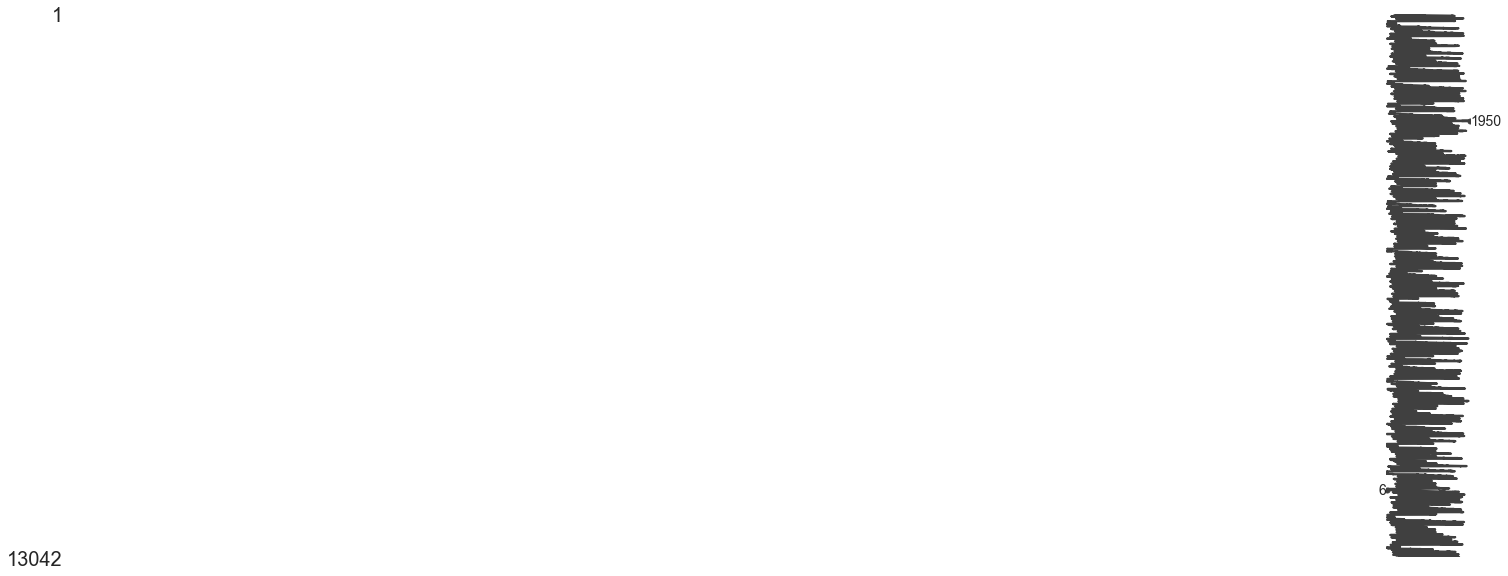

In [13]:
# Missingno: Plot
# Can only comfortably accommodate about 50 variables

missing_plot = msno.matrix(analysis_df) 
fig = missing_plot.get_figure()
fig.savefig('../../3_Outputs/Missing Data Visualizations/Missing Plot - All.jpg')

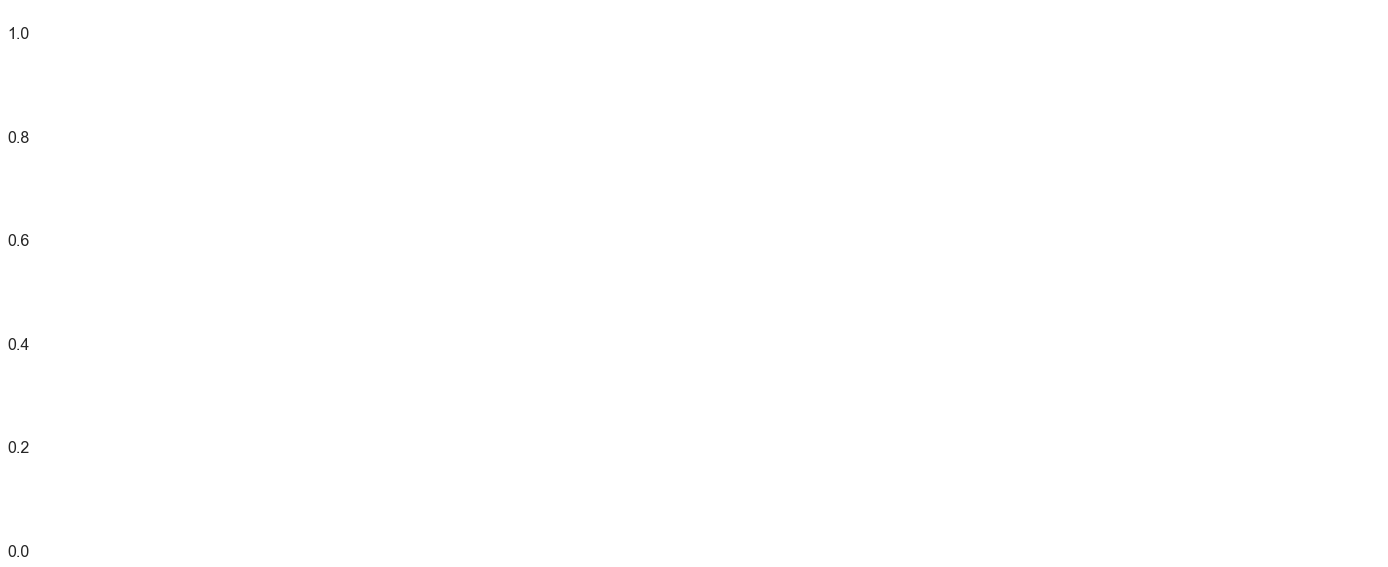

In [14]:
# Missingno: Bar plot

msno.bar(analysis_df) 

In [15]:
# Missingno: Dendogram

#msno.dendrogram(analysis_df)

----

**Data Imputation** <br>
Docs: https://datascienceplus.com/knnimputer-for-missing-value-imputation-in-python-using-scikit-learn/

*Prerequisites*

In [62]:
# Create column_names

column_names = analysis_df.columns
column_names = column_names[9:]
column_names[0:5]

Index(['longitude', 'latitude',
       '2005 PPP conversion factor, GDP (LCU per international $)',
       '2005 PPP conversion factor, private consumption (LCU per international $)',
       'Access to clean fuels and technologies for cooking (% of population)'],
      dtype='object')

*KNN Imputer*

In [51]:
# Initialize Imputer

imputer = KNNImputer(n_neighbors=5) #round(np.sqrt(len(analysis_df.columns)))-1
print(imputer)

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')


In [52]:
# Impute the values

data = imputer.fit_transform(analysis_df.loc[:,'longitude':])

In [54]:
# View Data

data[1:5]

array([[69.1761    , 34.5228    ,  4.76261761, ...,  2.80813051,
        15.06      , -0.19976718],
       [69.1761    , 34.5228    ,  4.76261761, ...,  2.80411329,
        15.06      , -0.19976718],
       [69.1761    , 34.5228    ,  4.54756013, ...,  2.78617089,
        15.06      , -0.19300738],
       [69.1761    , 34.5228    ,  4.74195492, ...,  2.754223  ,
        15.06      , -0.19300738]])

In [65]:
# Create New Dataframe with Imputed Data

imputed_df = pd.DataFrame(data = data,
                          columns = column_names)

In [81]:
# See dimensions of new dataframe

imputed_df.shape

(13042, 2314)

In [66]:
# View imputed_df

imputed_df.head()

,longitude,latitude,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",...,Labor.force.participation.rate..total....of.total.population.ages.15.64...modeled.ILO.estimate.,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y
0,69.1761,34.5228,4.762618,5.784574,0.536,100.0,100.0,100.0,27.825336,25.302754,...,61.736799,74.856875,4.1602,276087.2,13.9,32.446,7.45,2.798308,15.06,-0.199767
1,69.1761,34.5228,4.762618,5.784574,0.526,100.0,100.0,100.0,27.825336,25.302754,...,61.736799,74.856875,7.6538,195999.6,13.9,32.962,7.45,2.808131,15.06,-0.199767
2,69.1761,34.5228,4.762618,5.784574,0.526,100.0,100.0,100.0,27.825336,25.302754,...,69.058401,71.941730,5.2414,-20000.0,13.9,33.471,7.45,2.804113,15.06,-0.199767
3,69.1761,34.5228,4.547560,5.665272,0.536,100.0,100.0,100.0,25.629222,25.559682,...,63.873800,54.693568,7.0762,278921.8,13.9,33.971,7.45,2.786171,15.06,-0.193007
4,69.1761,34.5228,4.741955,5.932590,0.526,100.0,100.0,100.0,25.629222,25.559682,...,66.003000,59.874157,6.8932,195999.6,13.9,34.463,7.45,2.754223,15.06,-0.193007


In [107]:
# View analysis_df

analysis_df2 = analysis_df.loc[:, 'country':'capitalCity']
analysis_df2.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity
0,Afghanistan,1960.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul
1,Afghanistan,1961.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul
2,Afghanistan,1962.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul
3,Afghanistan,1963.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul
4,Afghanistan,1964.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul


*Concatenate Analysis_df and Imputed_df together*

In [108]:
# Concat dataframes together

final_df = pd.concat([analysis_df2, imputed_df], axis = 1) #.reindex(analysis_df2.index)
#final_df = pd.merge(analysis_df2, imputed_df, on = ['longitude','latitude'])

In [109]:
# View the dimensions of final_df

final_df.shape

(13042, 2323)

In [110]:
# View final_df

final_df.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Labor.force.participation.rate..total....of.total.population.ages.15.64...modeled.ILO.estimate.,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y
0,Afghanistan,1960.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,61.736799,74.856875,4.1602,276087.2,13.9,32.446,7.45,2.798308,15.06,-0.199767
1,Afghanistan,1961.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,61.736799,74.856875,7.6538,195999.6,13.9,32.962,7.45,2.808131,15.06,-0.199767
2,Afghanistan,1962.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,69.058401,71.941730,5.2414,-20000.0,13.9,33.471,7.45,2.804113,15.06,-0.199767
3,Afghanistan,1963.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,63.873800,54.693568,7.0762,278921.8,13.9,33.971,7.45,2.786171,15.06,-0.193007
4,Afghanistan,1964.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,66.003000,59.874157,6.8932,195999.6,13.9,34.463,7.45,2.754223,15.06,-0.193007


In [122]:
# Check if there are any missing values
# Still are some missing values

final_df.isnull().any()

country                                                         False
date                                                             True
code                                                             True
iso2Code                                                         True
region                                                           True
                                                                ...  
Life.expectancy.at.birth..total..years.                         False
Fertility.rate..total..births.per.woman.                        False
Population.ages.65.and.above....of.total.population.            False
Unmet.need.for.contraception....of.married.women.ages.15.49.    False
Voice.and.Accountability..Estimate.y                            False
Length: 2323, dtype: bool

In [124]:
#Find nan_rows

nan_rows = []

for var in final_df.loc[:, 'country':'capitalCity'].columns:
    print(var)
    nan_row = final_df[final_df[var].isnull()]
    nan_rows.append(nan_row)

country
date
code
iso2Code
region
adminregion
incomeLevel
lendingType
capitalCity


In [125]:
nan_rows

[Empty DataFrame
 Columns: [country, date, code, iso2Code, region, adminregion, incomeLevel, lendingType, capitalCity, longitude, latitude, 2005 PPP conversion factor, GDP (LCU per international $), 2005 PPP conversion factor, private consumption (LCU per international $), Access to clean fuels and technologies for cooking (% of population), Access to electricity (% of population), Access to electricity, rural (% of rural population), Access to electricity, urban (% of urban population), Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+), Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+), Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+), Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+), Account ownership at a fina

In [126]:
# Drop if Taiwan

final_df.drop(final_df[final_df['country'] == 'Taiwan, China'].index, inplace = True) 

In [127]:
# Check Dimensions

final_df.shape

(13020, 2323)

In [129]:
# Check for Missing Values
# Acceptable Missing Values

final_df.loc[:, 'country':'capitalCity'].isnull().any()

country        False
date           False
code           False
iso2Code        True
region         False
adminregion     True
incomeLevel    False
lendingType    False
capitalCity     True
dtype: bool

----

**Output CSV**

In [130]:
final_df.to_csv('../../2_Inputs/Final/final_df.csv')